In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BlinkIT_Data_Practice .csv to BlinkIT_Data_Practice .csv


In [7]:
df = pd.read_csv('BlinkIT_Data_Practice .csv')

In [8]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,?145,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,?115,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,?165,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,?127,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,?55,5.0


In [10]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
7055,Regular,FDH26,Canned,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,?141,4.0
7056,Regular,FDG56,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,?60,4.0
7057,Regular,FDM15,Meat,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,?153,4.0
7058,Regular,FDX57,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,?96,4.0
7059,Regular,FDD10,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.046208,20.60,?178,4.0


In [11]:
df.shape

(7060, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           7060 non-null   object 
 1   Item Identifier            7060 non-null   object 
 2   Item Type                  7060 non-null   object 
 3   Outlet Establishment Year  7060 non-null   int64  
 4   Outlet Identifier          7060 non-null   object 
 5   Outlet Location Type       7060 non-null   object 
 6   Outlet Size                7060 non-null   object 
 7   Outlet Type                7060 non-null   object 
 8   Item Visibility            7060 non-null   float64
 9   Item Weight                7060 non-null   float64
 10   Sales                     7060 non-null   object 
 11  Rating                     7060 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 662.0+ KB


In [15]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Rating
count,7060.000000,7060.000000,7060.000000,7060.000000
mean,2016.129462,0.063963,12.857645,3.965382
std,3.417571,0.048625,4.643456,0.610523
min,2011.000000,0.000000,4.555000,1.000000
25%,2014.000000,0.026768,8.773750,4.000000
50%,2016.000000,0.052493,12.600000,4.000000
75%,2020.000000,0.092774,16.850000,4.200000
max,2022.000000,0.311090,21.350000,5.000000


## **Average Sales by Item Type**

In [26]:
df.groupby('Item Type')['Sales'].mean().sort_values(ascending=False)

,Sales
Item Type,
Dairy,149.333922
Household,149.159420
Starchy Foods,147.723077
Snack Foods,146.712551
Seafood,145.039216
Fruits and Vegetables,144.433759
Breakfast,142.651685
Breads,140.514706
Meat,139.928783


## **Sales by Outlet Type**

In [27]:
df.groupby('Outlet Type')['Sales'].sum()

,Sales
Outlet Type,
Grocery Store,78124
Supermarket Type1,787529
Supermarket Type2,131471


## **Fat Content vs Sales**

In [28]:
df.groupby('Item Fat Content')['Sales'].mean()

,Sales
Item Fat Content,
Low Fat,141.206381
Regular,141.399358
low fat,137.940476


## **Sales by Outlet Type**

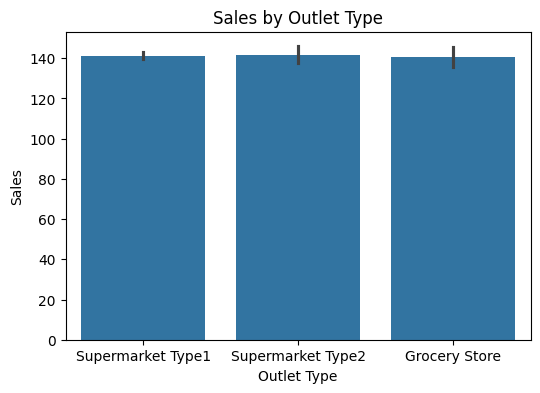

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x='Outlet Type', y='Sales', data=df)
plt.title("Sales by Outlet Type")
plt.show()


## **Item Fat Content Distribution**

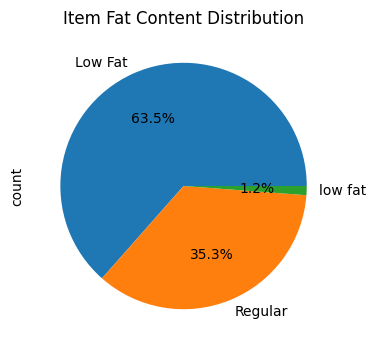

In [33]:
plt.figure(figsize=(5,4))
df['Item Fat Content'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Item Fat Content Distribution")
plt.show()


## **Item Visibility vs Sales**

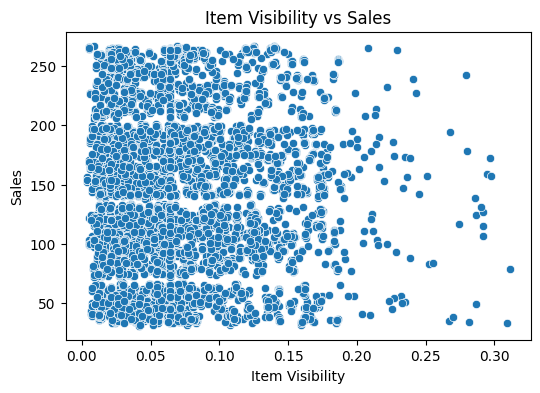

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Item Visibility', y='Sales', data=df)
plt.title("Item Visibility vs Sales")
plt.show()


## **Top 10 Item Types**

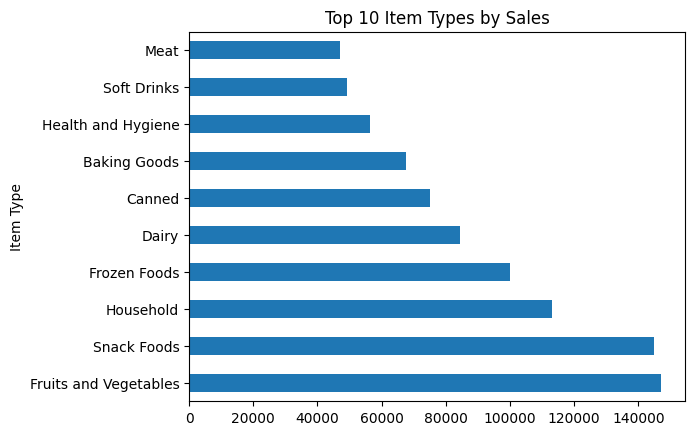

In [37]:
top_items = df.groupby('Item Type')['Sales'].sum().nlargest(10)
top_items.plot(kind='barh', title='Top 10 Item Types by Sales')
plt.show()